In [98]:
import numpy as np
from  matplotlib import pyplot as plt

%matplotlib inline

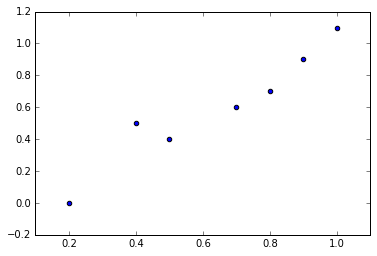

In [99]:
X = np.array([[0.2, 0.5, 0.4, 0.7, 0.8, 0.9, 1]])
Y = np.array([[0, 0.4, 0.5, 0.6, 0.7, 0.9, 1.1]])
plt.scatter(X,Y)

In [144]:
def DMatrix(X, degree):
    """
    Calculate D matrix for given degree
    """
    D = (X**0).T
    #print D.shape
    for i in range(1,degree+1):
        D = np.concatenate((D, (X**i).T), axis=1)
    return D

In [145]:
def fit(X, Y, degree):
    """
    fit the regression line for given degree
    """
    #caclucate D matrix
    D = DMatrix(X, degree)
    #cacluate weights
    w = np.dot(np.dot(np.linalg.inv(np.dot(D.T, D)), D.T), Y.T)
    #print 'w = ', w.T[0]
    #return line fitted to w (reverse)
    return np.poly1d(w.T[0][::-1])

In [114]:
p = fit(X,Y, 1)
p4 = fit(X,Y, 4)

w =  [-0.16293103  1.18678161]
w =  [ -2.30620525  19.48475446 -49.4560823   52.87264048 -19.50350763]


In [106]:
print p(-3)
print p(5)

-3.72327586207
5.77097701149


(-0.1, 1.1)

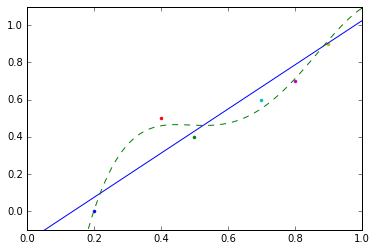

In [105]:
xp = np.linspace(0, 1, 100)
_ = plt.plot(X, Y, '.', xp,p(xp), '-', xp, p4(xp), '--')
plt.ylim(-0.1,1.1)

In [115]:
def g_hat(X,x,g):
    s = 0
    for i in X:
        s = s + g(i)
    return s / X.size

In [156]:
P1 = []
P4 = []
for i in range(0,X.size):
    x = np.delete(X,i,1)
    y = np.delete(Y,i,1)
    P1.append(fit(x,y,1))
    P4.append(fit(x,y,4))



In [169]:
G1_hat = []
G4_hat = []
for i in range(0,X.size):
    sum1 = 0.0
    sum4 = 0.0
    for j in range(0, len(P1)):
        sum1 += P1[j](X[0][i])
        sum4 += P4[j](X[0][i])
    G1_hat.append(sum1 / len(P1))
    G4_hat.append(sum1 / len(P4))

In [172]:
sum1 = 0.0
sum4 = 0.0
for i in range(0,X.size):
    for j in range(0, len(P1)):
        sum1 += (P1[j](X[0][i]) - G1_hat[i])**2
        sum4 += (P4[j](X[0][i]) - G4_hat[i])**2
variance1 = 1.0/(X.size*len(P1)) * sum1
variance4 = 1.0/(X.size*len(P4)) * sum4
print 'variance of degree1:', variance1
print 'variance of degree4:', variance4

variance of degree1: 0.000823518422483
variance of degree4: 0.0618045253467


In [175]:
def func(x):
    return 0.5 * np.exp(-1 * np.abs(x))

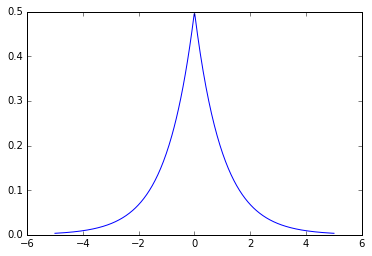

In [176]:

xp = np.linspace(-5, 5, 500)
_ = plt.plot(xp,func(xp), '-')